In [1]:
import cv2
from PIL import Image
from skimage import io, exposure, filters, morphology, color
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread('1.jpg', 0)
#img2 = cv2.imread('2.jpg', 0)
print(img)
print(img.dtype)
print(img.shape)
#display(Image.fromarray(img))



[[ 3 18  2 ...  4  3  1]
 [ 3 17  3 ...  3  2  1]
 [ 0 11  1 ...  1  2  1]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
uint8
(892, 720)


In [3]:
# Define the structuring elements for horizontal and vertical lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1))
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 40))

In [4]:
# Use morphological operations to highlight the lines
horizontal_lines = cv2.morphologyEx(img, cv2.MORPH_OPEN, horizontal_kernel)
vertical_lines = cv2.morphologyEx(img, cv2.MORPH_OPEN, vertical_kernel)

In [5]:
# Subtract the highlighted lines from the original denoised image
img_without_horizontal = cv2.subtract(img, horizontal_lines)
img2 = cv2.subtract(img_without_horizontal, vertical_lines)

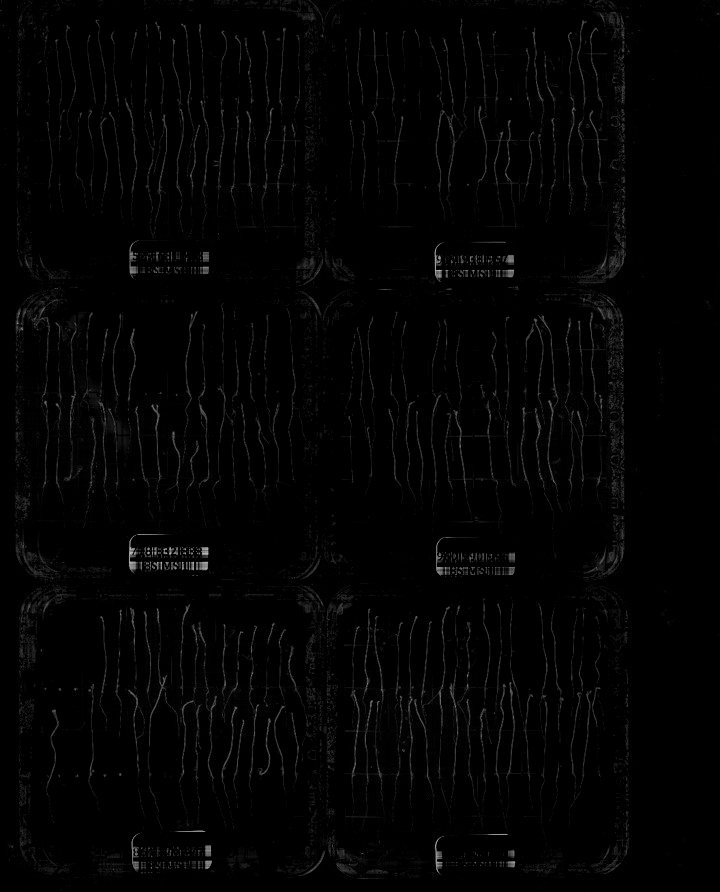

In [6]:
# Show the final image
display(Image.fromarray(img2))

191


<Figure size 640x480 with 0 Axes>

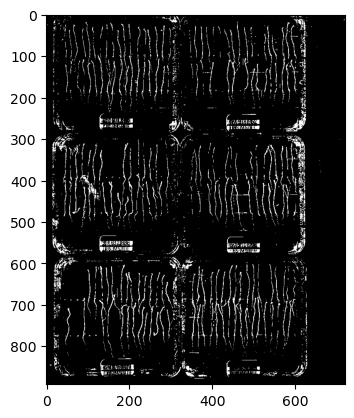

In [8]:
# Subtract the highlighted lines from the original denoised image
img_without_horizontal = cv2.subtract(img, horizontal_lines)
img2 = cv2.subtract(img_without_horizontal, vertical_lines)
print(np.max(img2))


plt.figure(1)

threshold = 15
idx = img2 > threshold
img4 = np.zeros_like(img2)
img4[idx] = 255

# Convert to uint8
img4 = img4.astype(np.uint8)

# Show the normalized image
plt.figure(2)
plt.imshow(img4, cmap='gray')
plt.show()